In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

2.2.2


In [2]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import to_networkx
import networkx as nx
from torch_geometric.data import Data
import matplotlib.pyplot as plt

In [4]:
x = torch.tensor(
    [[6, 4],
     [0, 1],
     [5, 3],
     [1, 2]]
)

edge_index = torch.tensor(
    [[0, 1, 0, 2, 1, 2, 2, 3],
     [1, 0, 2, 0, 2, 1, 3, 2]]
)

edge_attr = torch.tensor(
    [[1],
     [1],
     [4],
     [4],
     [2],
     [2],
     [5],
     [5]]
)

y = torch.tensor(
    [[1],
     [0],
     [1],
     [0]]
)


graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
print(graph)

Data(x=[4, 2], edge_index=[2, 8], edge_attr=[8, 1], y=[4, 1])


In [5]:
# Define graph components
x = torch.tensor(
    [[6, 4],
     [0, 1],
     [5, 3],
     [9, 9],
     [1, 2]]
)

edge_index = torch.tensor(
    [[0, 1, 0, 2, 1, 2, 2, 3, 3, 4],
     [1, 0, 2, 0, 2, 1, 3, 2, 4, 3]]
)

edge_attr = torch.tensor(
    [[1],
     [1],
     [4],
     [4],
     [2],
     [2],
     [5],
     [5],
     [5],
     [5]]
)

y = torch.tensor(
    [[1],
     [0],
     [1],
     [0],
     [0]]
)


graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
print(graph)

Data(x=[5, 2], edge_index=[2, 10], edge_attr=[10, 1], y=[5, 1])


/home/littlefish/miniconda3/envs/gnn/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


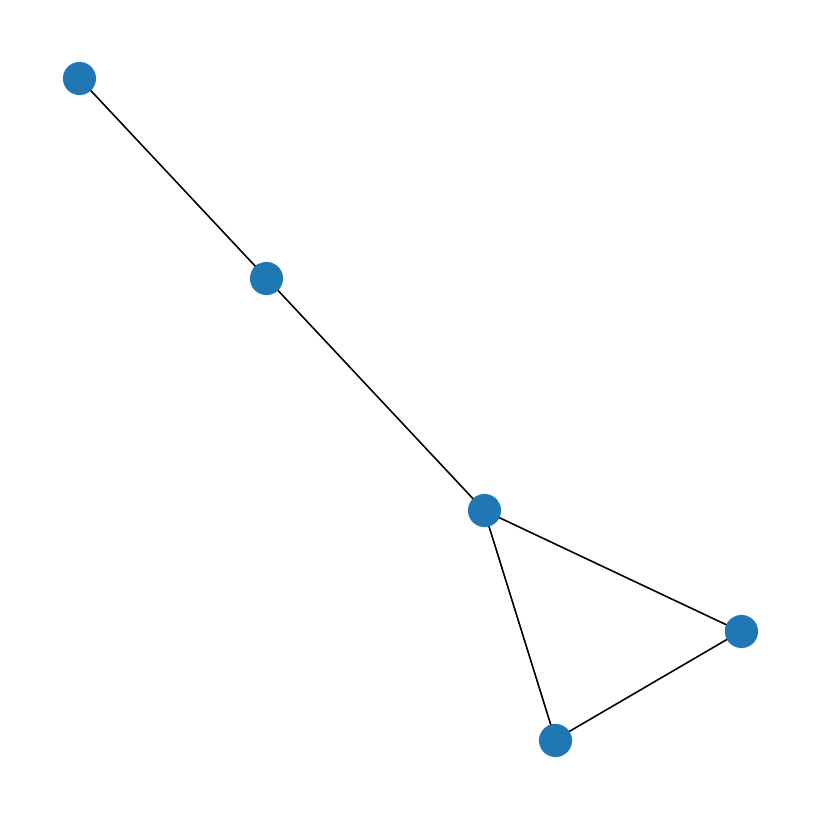

In [6]:
def visualize_graph(graph):
    vis = to_networkx(graph)
    plt.figure(1, figsize=(8, 8))
    nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=120, linewidths=13)
    plt.show()

# Visualize graph
visualize_graph(graph)